<a href="https://colab.research.google.com/github/Ritam646/Smart-Classroom-Cheating-Detection-YOLO26/blob/main/smart_classroom_cheating_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.3 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

model = YOLO("yolo26n.pt")
model.train(
    data="/content/drive/MyDrive/Exam-Monitoring-System/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Exam-Monitoring-System/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x787858c3a780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
metrics = model.val()

print("mAP50-95:", metrics.box.map)
print("mAP50:", metrics.box.map50)
print("Mean Precision:", metrics.box.mp)
print("Mean Recall:", metrics.box.mr)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
val: Fast image access ✅ (ping: 1.4±1.4 ms, read: 3.3±0.7 MB/s, size: 23.8 KB)
val: Scanning /content/drive/MyDrive/Exam-Monitoring-System/valid/labels.cache... 457 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 457/457 91.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 29/29 4.5it/s 6.5s
                   all        457        593      0.782      0.693      0.761       0.58
              cheating        271        335      0.739        0.6      0.646      0.466
                  good        219        258      0.824      0.787      0.876      0.695
Speed: 1.6ms preprocess, 3.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to /content/runs/detect/val2
mAP50-95: 0.5804657060659753
mAP50: 0.7613649128389022
Mean Precision: 0.7815071024748761
Mean Recall: 0.6934108527131783


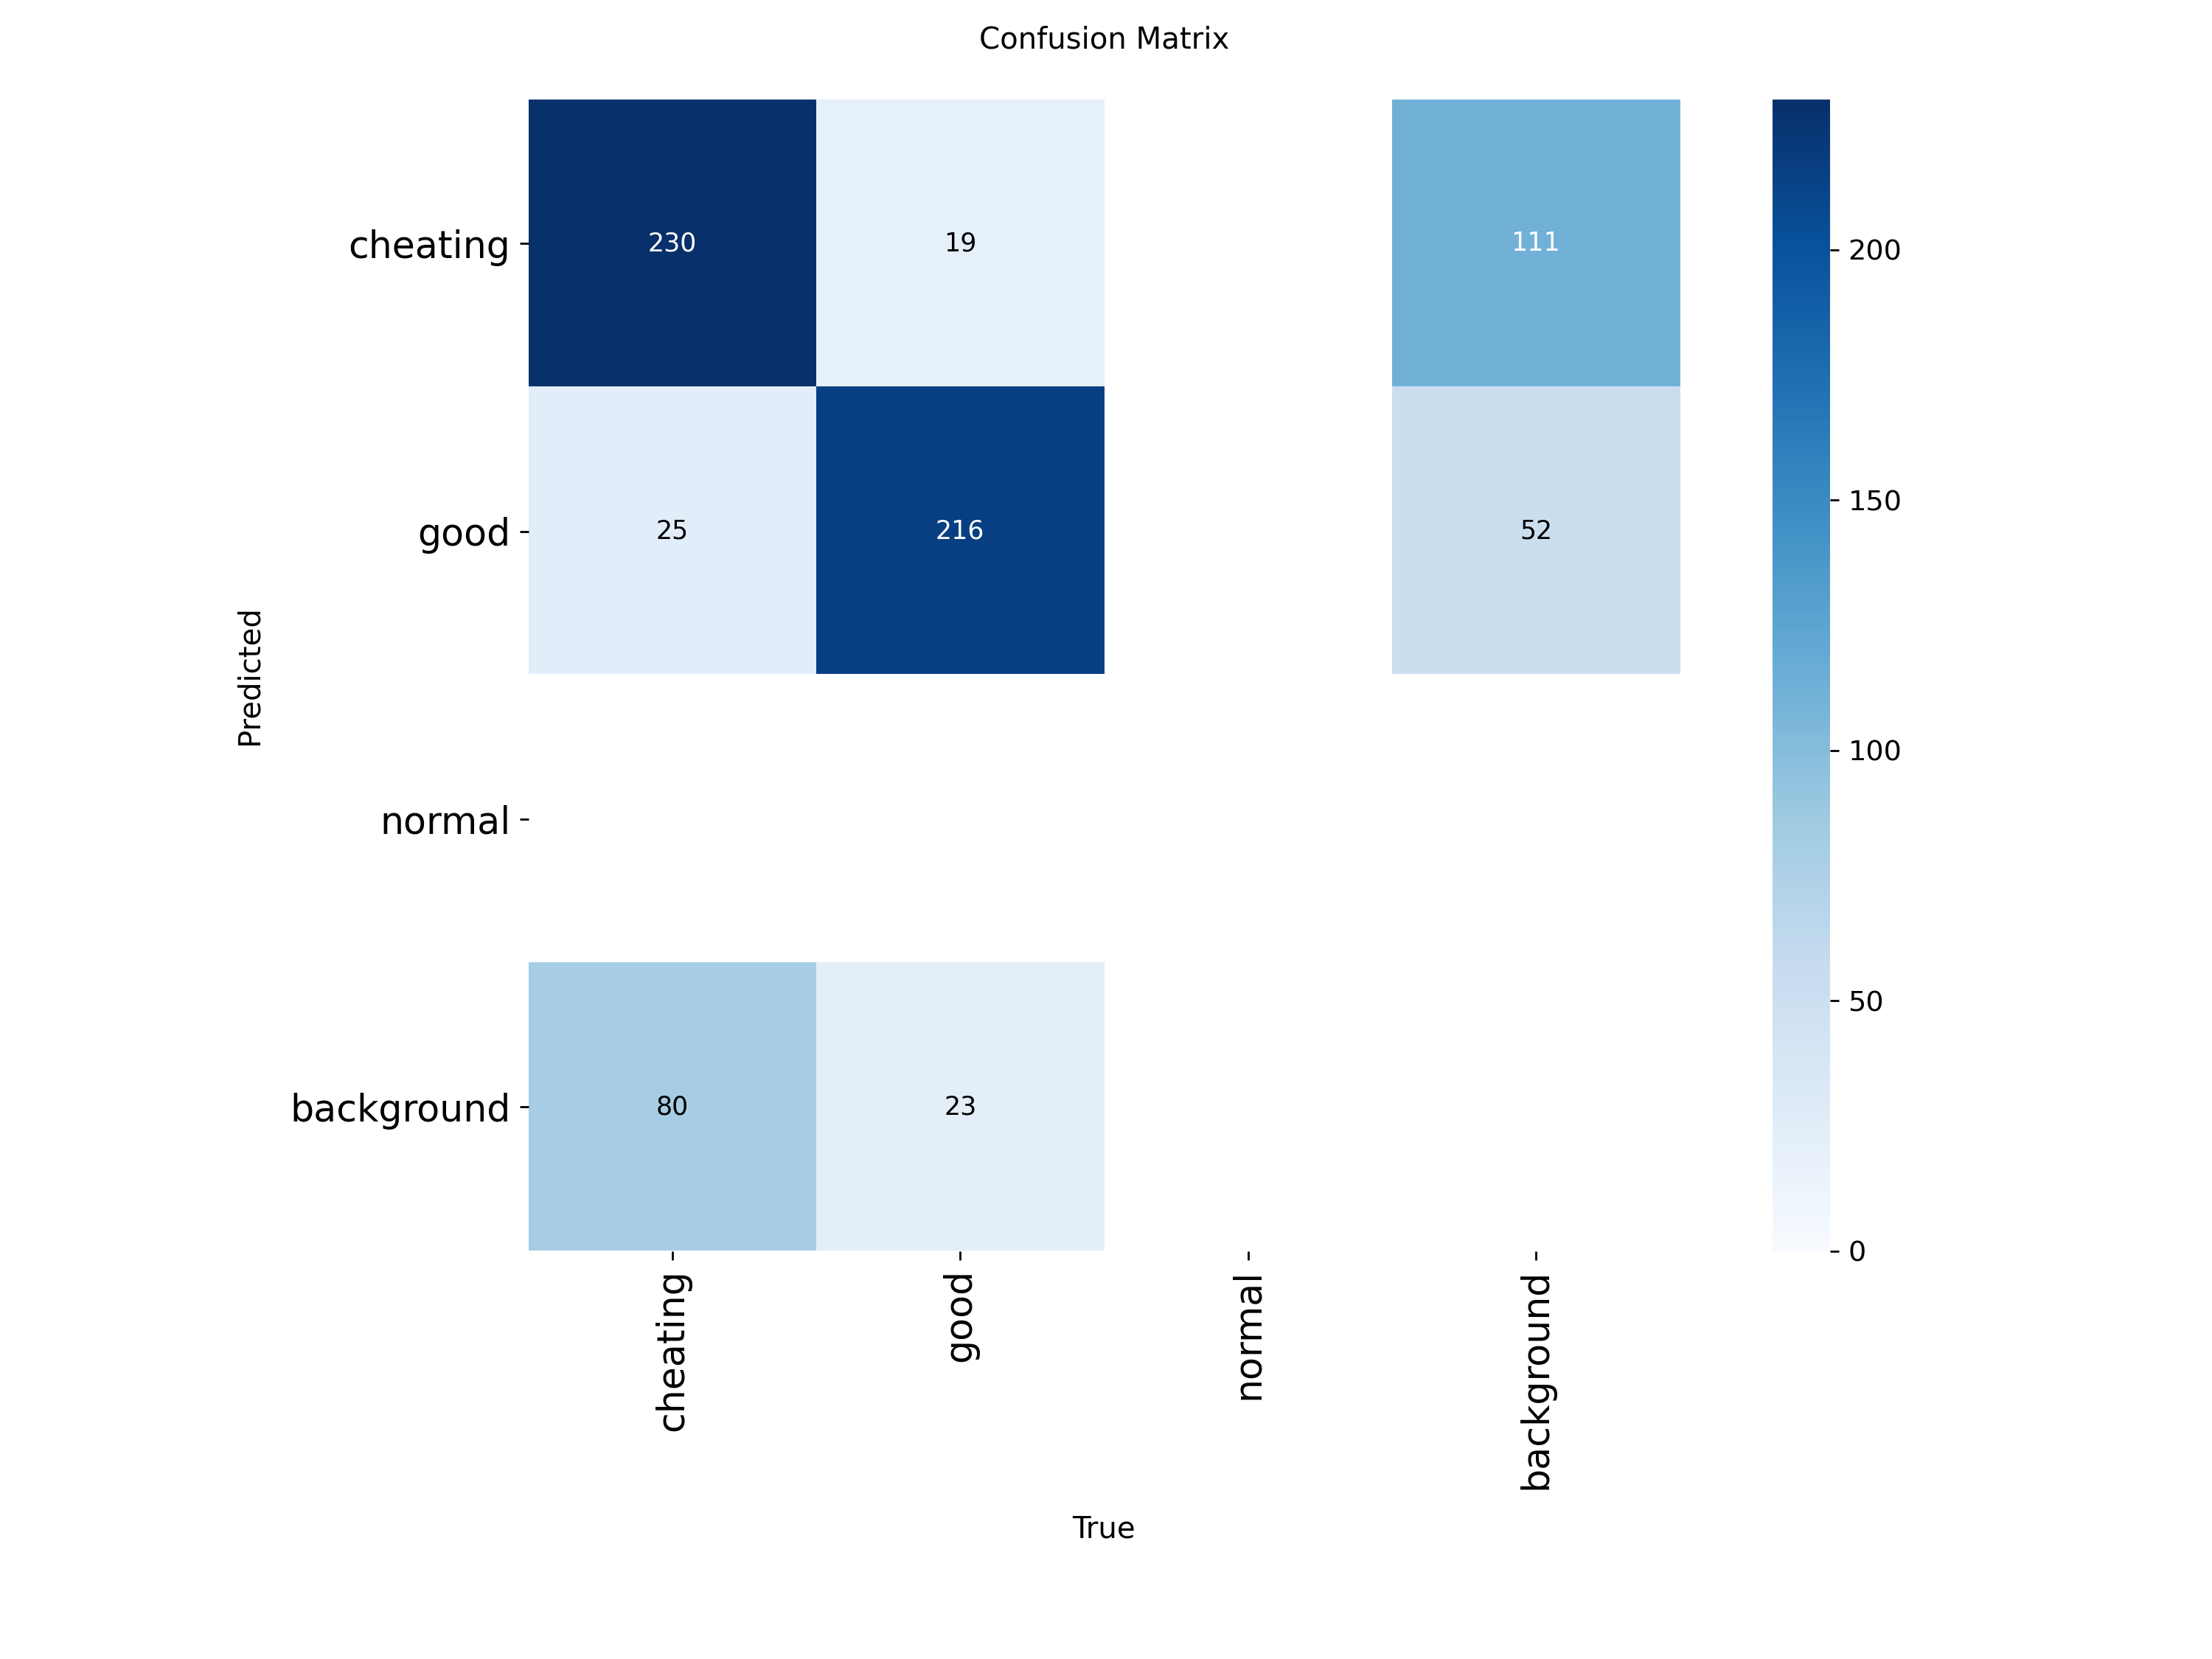

In [10]:
from IPython.display import Image
Image('/content/runs/detect/train/confusion_matrix.png')

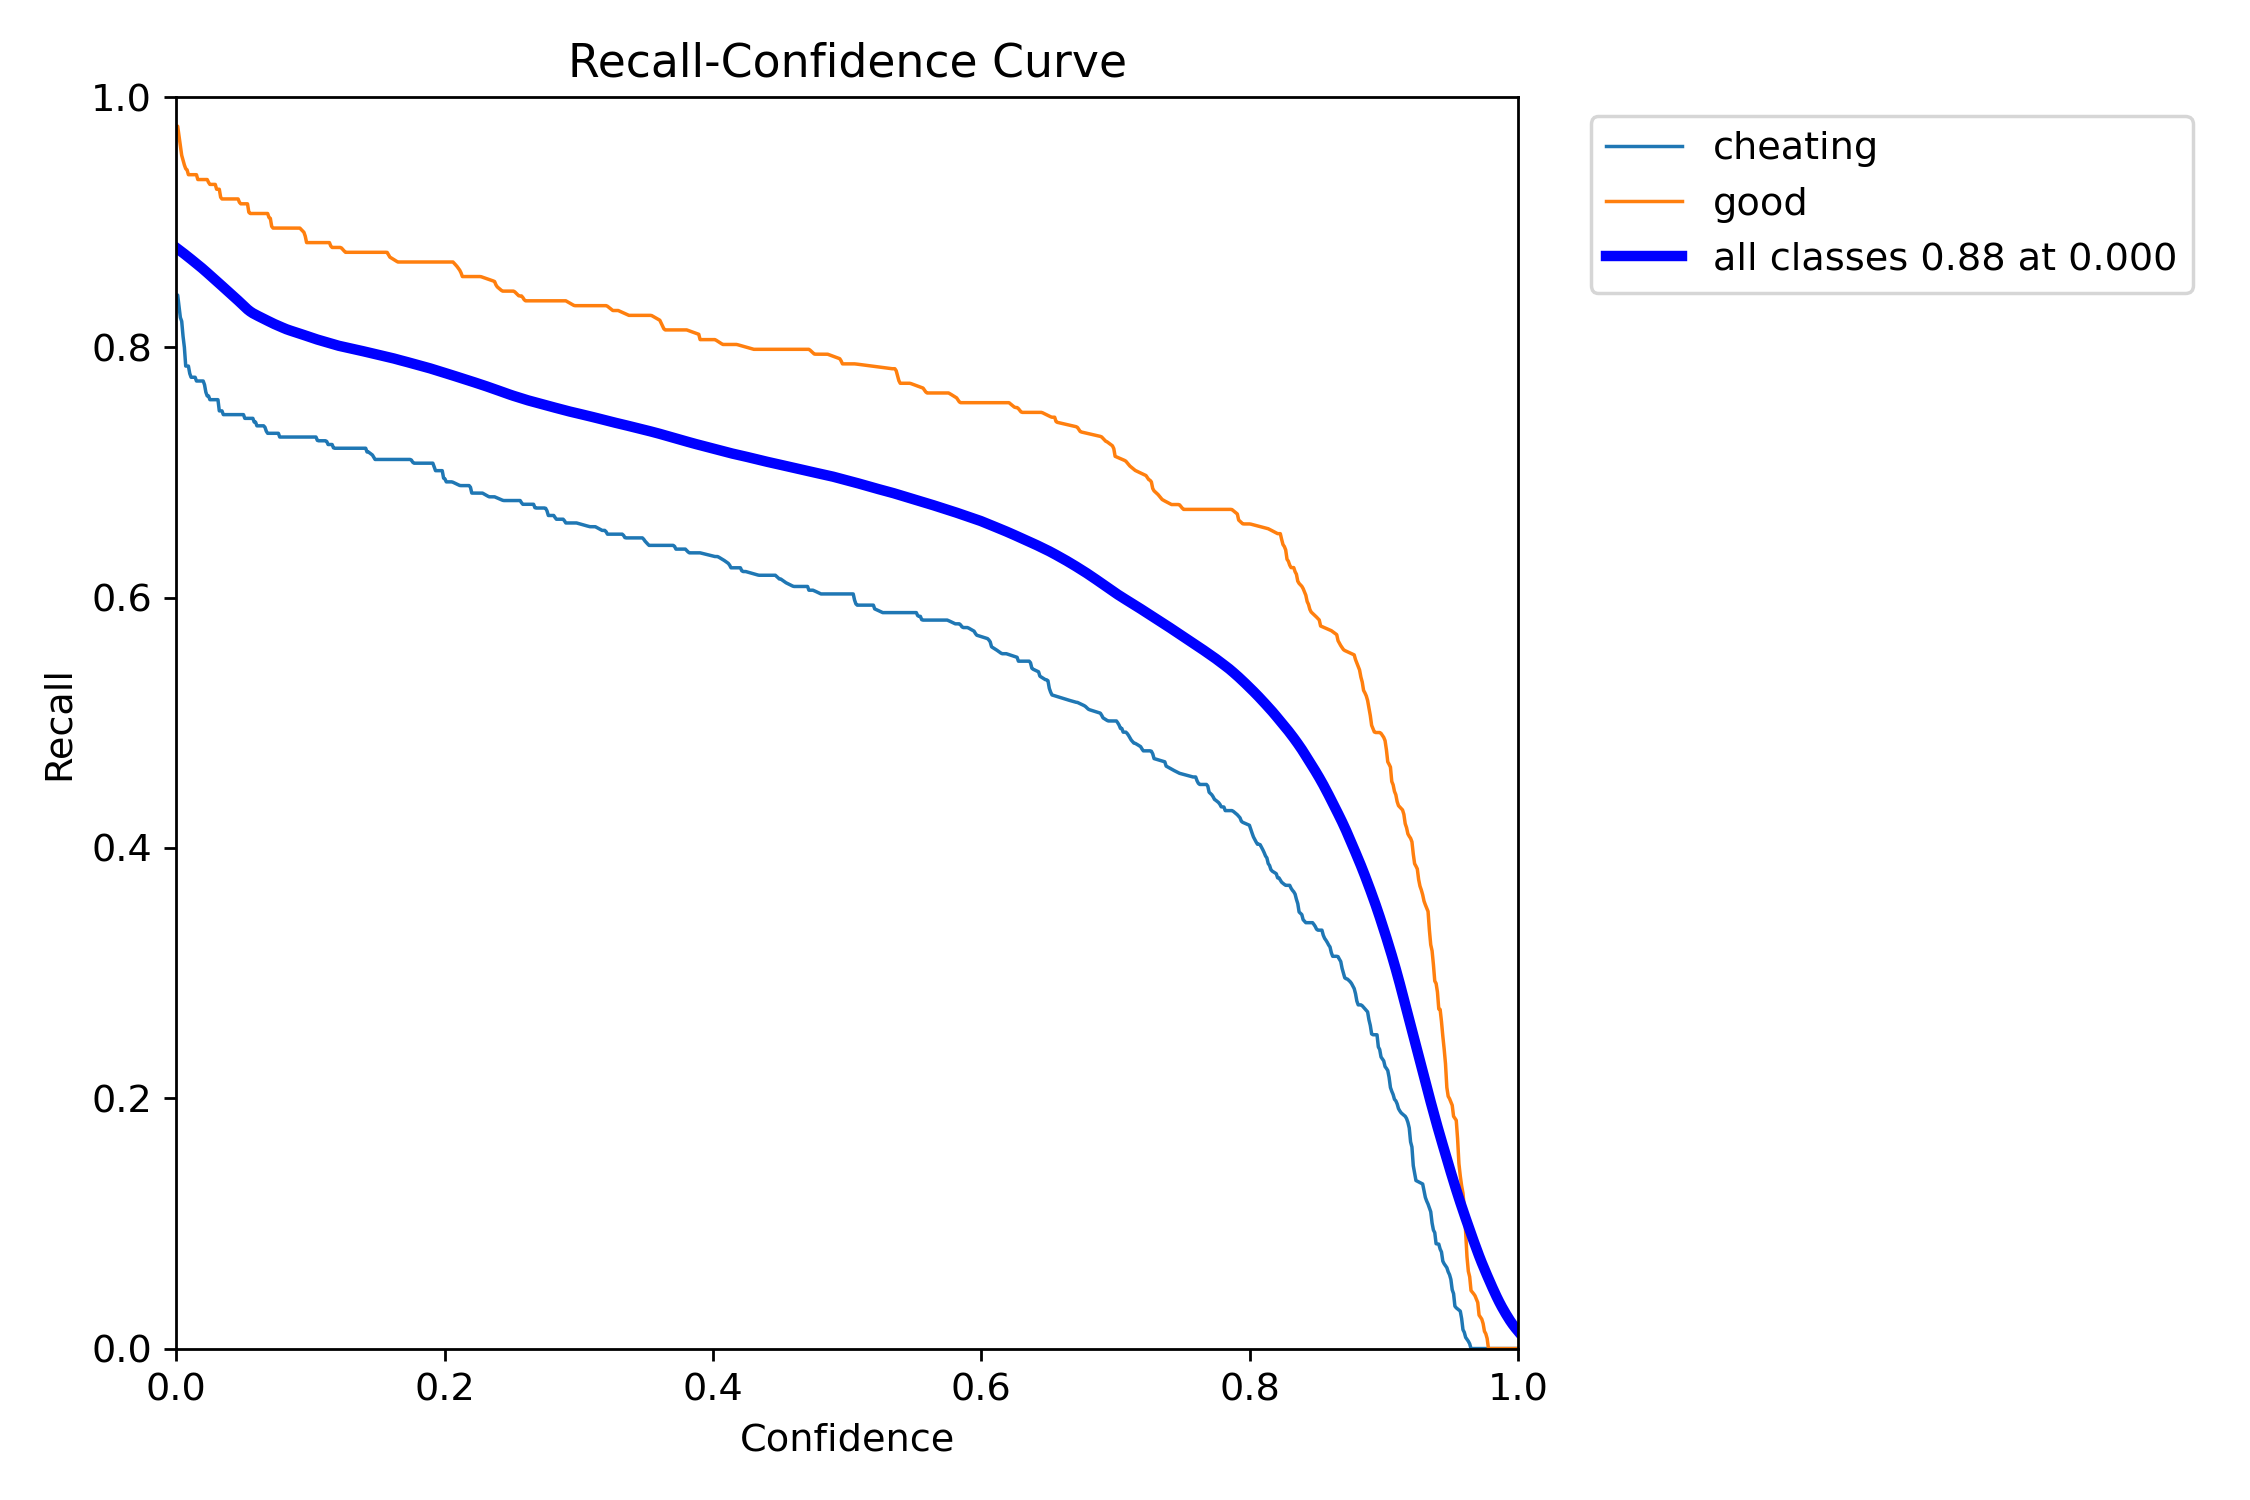

In [14]:

Image("/content/runs/detect/train/results.png")
Image("/content/runs/detect/train/BoxPR_curve.png")
Image("/content/runs/detect/train/BoxF1_curve.png")
Image("/content/runs/detect/train/BoxP_curve.png")
Image("/content/runs/detect/train/BoxR_curve.png")

In [15]:
best_model = YOLO("/content/runs/detect/train/weights/best.pt")

best_model.predict(
    source="/content/drive/MyDrive/exam-cheat-test.jpeg",
    conf=0.5,
    save=True
)


image 1/1 /content/drive/MyDrive/exam-cheat-test.jpeg: 640x640 5 cheatings, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cheating', 1: 'good', 2: 'normal'}
 obb: None
 orig_img: array([[[157, 175, 182],
         [157, 175, 182],
         [157, 175, 182],
         ...,
         [149, 161, 161],
         [147, 159, 159],
         [145, 157, 157]],
 
        [[156, 174, 181],
         [155, 174, 181],
         [155, 173, 180],
         ...,
         [149, 161, 161],
         [148, 160, 160],
         [146, 158, 158]],
 
        [[157, 176, 183],
         [154, 176, 182],
         [154, 173, 180],
         ...,
         [151, 163, 163],
         [149, 161, 161],
         [148, 160, 160]],
 
        ...,
 
        [[ 89, 134, 185],
         [ 86, 131, 182],
         [ 83, 128, 179],
         ...,
         [ 69,  77,  76],
         [143, 151, 150],
         [139, 147, 146]],
 
        [[ 90, 135, 186],
         [ 86, 131, 182],
         [ 84, 129, 180],
      

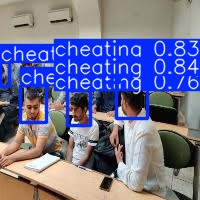

In [22]:
from IPython.display import Image
Image('/content/runs/detect/predict2/exam-cheat-test.jpg')

In [37]:
best_model.predict(
    source="/content/drive/MyDrive/exam-monitor-test2.jpg",
    conf=0.25,
    save=True
)


image 1/1 /content/drive/MyDrive/exam-monitor-test2.jpg: 640x640 7 cheatings, 4 goods, 17.3ms
Speed: 2.8ms preprocess, 17.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cheating', 1: 'good', 2: 'normal'}
 obb: None
 orig_img: array([[[168, 181, 189],
         [168, 181, 189],
         [168, 181, 189],
         ...,
         [144, 141, 156],
         [113, 110, 125],
         [ 82,  79,  94]],
 
        [[168, 181, 189],
         [168, 181, 189],
         [168, 181, 189],
         ...,
         [154, 151, 166],
         [134, 131, 146],
         [112, 109, 124]],
 
        [[168, 181, 189],
         [168, 181, 189],
         [168, 181, 189],
         ...,
         [158, 156, 168],
         [151, 148, 163],
         [141, 138, 153]],
 
        ...,
 
        [[ 32,  34,  28],
         [ 37,  41,  35],
         [ 30,  35,  33],
         ...,
         [ 76,  85, 105],
         [ 76,  80,  99],
         [114, 115, 135]],
 
        [[ 41,  35,  28],
         [ 42,  38,  33],
         [ 33,  34,  32],
      

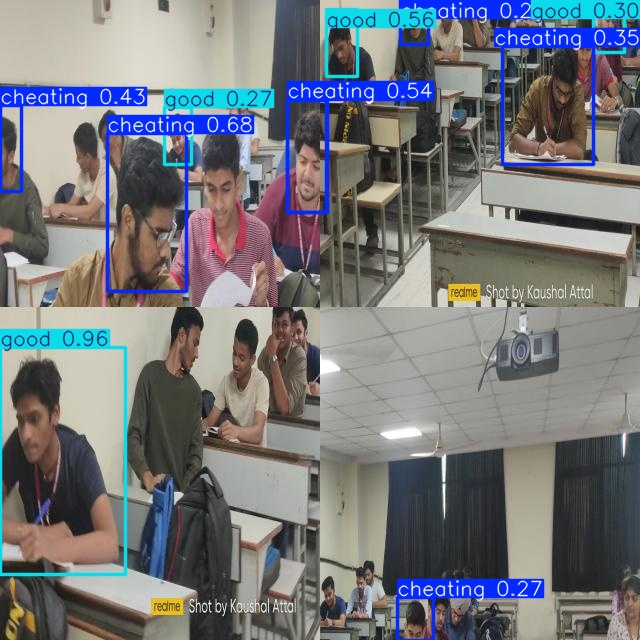

In [38]:
from IPython.display import Image
Image('/content/runs/detect/predict/exam-monitor-test2.jpg')

In [39]:
best_model.predict(
    source="/content/drive/MyDrive/exam-monitor-test3.jpg",
    conf=0.25,
    save=True
)


image 1/1 /content/drive/MyDrive/exam-monitor-test3.jpg: 384x640 6 cheatings, 1 good, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cheating', 1: 'good', 2: 'normal'}
 obb: None
 orig_img: array([[[ 3,  3,  3],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[24, 34, 52],
         [24, 34, 52],
         [24, 34, 52],
         ...,
         [18, 39, 47],
         [20, 39, 47],
         [20, 39, 47]],
 
        [[24, 34, 52],
         [24, 34, 52],
         [24, 34, 52],
         ...,
         [18, 39, 47],
         [20, 39, 47],
         [20, 39, 47]],
 
 

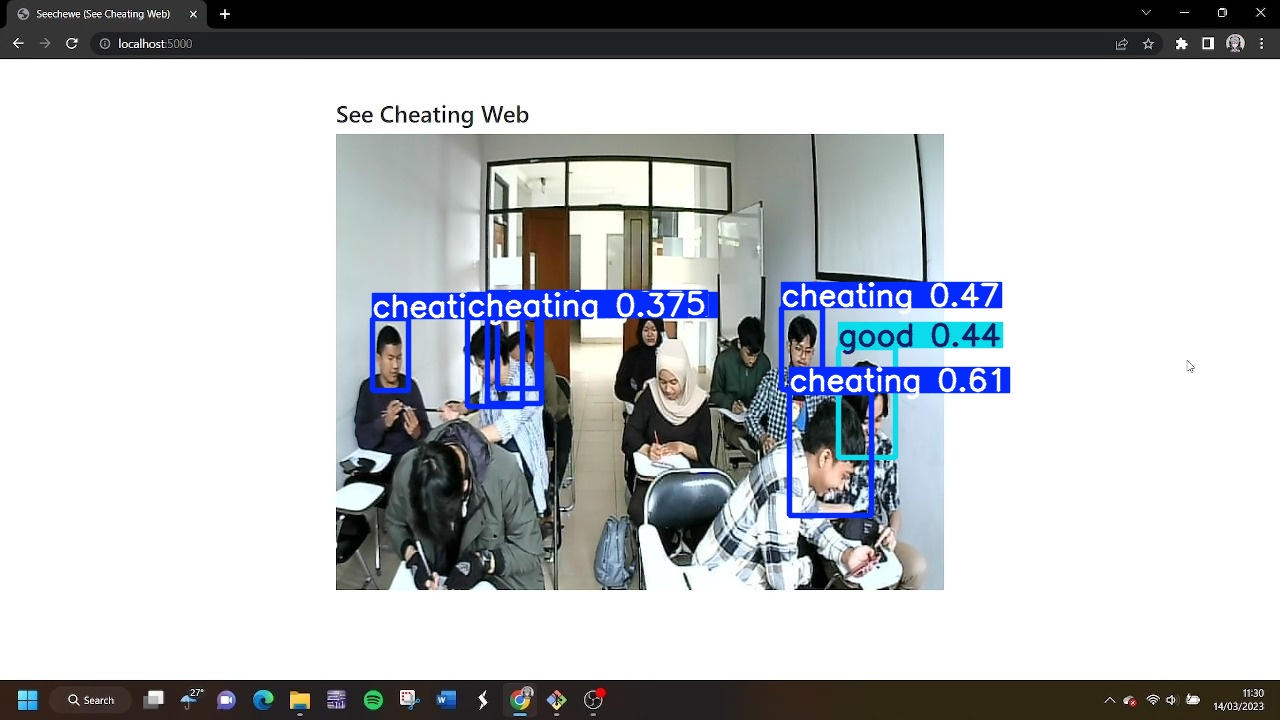

In [40]:
from IPython.display import Image
Image('/content/runs/detect/predict/exam-monitor-test3.jpg')

In [42]:
import shutil

shutil.copy(
    "/content/runs/detect/train/weights/best.pt",
    "/content/drive/MyDrive/cheating_model_best.pt"
)

print("Model exported to Google Drive successfully!")

Model exported to Google Drive successfully!


In [43]:
shutil.copytree(
    "/content/runs/detect/predict",
    "/content/drive/MyDrive/cheating_detection_results",
    dirs_exist_ok=True
)

print("All training results saved to Drive!")

All training results saved to Drive!
